<h1>Metodo de Maxima Verossimilhança usando Espectro de Potência</h1>
<h3>Aluno:Matheus Vitor, Astroinformática 2021<h3>

<p>No inicio do universo a matéria bariônica e os fótons estavam acoplados. A matéria buscava a atração devido a força gravitacional e a pressão do fótons exercia uma força contrária</p>
<!-- ![Alt Text](image path "title") -->
<p><img src="http://background.uchicago.edu/~whu/power/baosprings.gif" alt="Alt Text" title="Optional Title"></p>

<p>Quando a matéria e os fótons se desacoplaram esse padrão de interação ficou impresso na matéria barionica e pode ser observado nas estruturas em largas escalas.<p>

<p><img src="http://galaxies-cosmology-2015.wdfiles.com/local--files/baryon-acoustic-oscillations/bao_statistical.png" alt="Alt Text" title="Optional Title"></p>

O espectro de potência $P(k)$ é determinado como a transformada de Fourier da função de correlação da matéria $\xi(r)$. 
$$
\xi(r) =  \langle\,\delta(x),\delta(x')\rangle = \int\dfrac{d^{3}k}{(2\pi)^{3}}P(k)e^{ik.(x-x')}
$$
onde a variação de densidade de matéria é,
$$
\delta(x) =  \dfrac{\rho(x) -\bar{\rho} }{\bar{\rho}}
$$

In [71]:
# importando o modulo classy 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from classy import Class 
from math import pi
from nbodykit.lab import *
from nbodykit import style, setup_logging
from nbodykit.lab import cosmology

In [72]:
#Verificando o impacto de modificar a densidade crítica de Barions no universo
# Iniciando 
LambdaCDM = Class()
LambdaCDM2 = Class()
LambdaCDM3 = Class()
# pass input parameters
#Fiducial
LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
#################################
#Menos matéria barionica
LambdaCDM2.set({'omega_b':0.0123828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
LambdaCDM2.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
##################################
#Mais matéria barionica
LambdaCDM3.set({'omega_b':0.0323828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
LambdaCDM3.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})

# run class
LambdaCDM.compute()
LambdaCDM2.compute()
LambdaCDM3.compute()


In [73]:
# get P(k) at redhsift z=0
kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk  = [] # P(k) in (Mpc/h)**3
h  = LambdaCDM.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk.append(LambdaCDM.pk(k*h,0.)*h**3) # function .pk(k,z)

kk2 = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk2 = []
h2 = LambdaCDM2.h()
for k in kk:
    Pk2.append(LambdaCDM2.pk(k*h,0.)*h**3)
    
kk3 = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk3 = []
h3 = LambdaCDM3.h()
for k in kk:
    Pk3.append(LambdaCDM3.pk(k*h,0.)*h**3)

<Figure size 432x288 with 0 Axes>

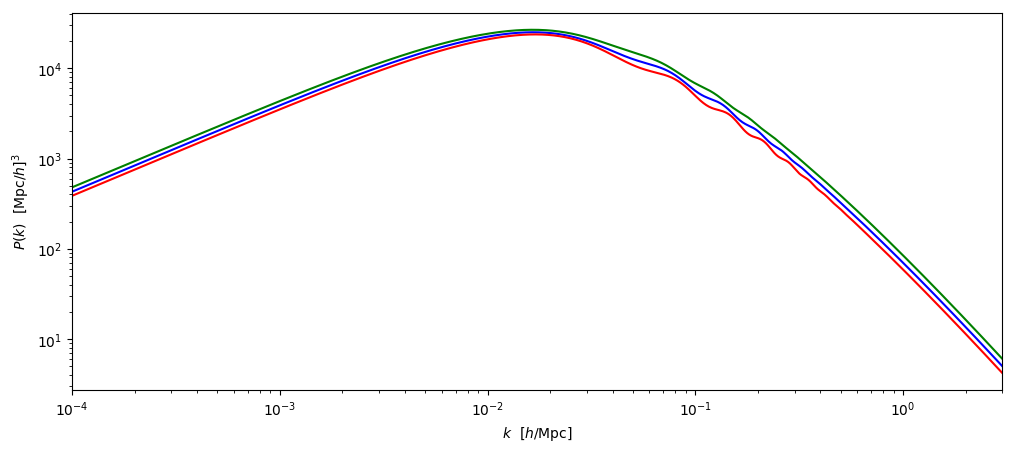

In [74]:
# plot P(k)
plt.figure(2)
plt.figure(figsize=(12, 5), dpi=100)
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,Pk,'b-') #LCDM
plt.plot(kk2,Pk2,'g-') # menos barions
plt.plot(kk3,Pk3,'r-') # mais barions

<Figure size 432x288 with 0 Axes>

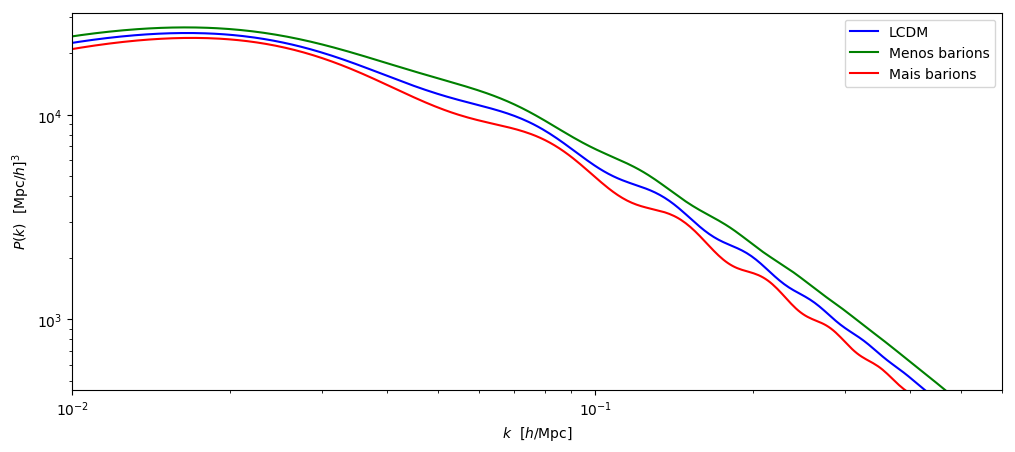

In [75]:
# plot P(k)
plt.figure(2)
plt.figure(figsize=(12, 5), dpi=100)
plt.xscale('log');plt.yscale('log');plt.xlim(0.01,0.6)
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.ylim(450,10**4.5)
plt.plot(kk,Pk,'b-',label='LCDM') #LCDM
plt.plot(kk2,Pk2,'g-',label='Menos barions') # menos barions
plt.plot(kk3,Pk3,'r-',label='Mais barions') # mais barions
plt.legend()

In [76]:
#apagando os modelos
LambdaCDM.empty()
LambdaCDM2.empty()
LambdaCDM3.empty()

In [77]:
#Observando como o parâmetro de Hubble interfere no Power Spectrum
# Iniciando 
LambdaCDM = Class()
LambdaCDM2 = Class()
LambdaCDM3 = Class()
# pass input parameters
#Fiducial
LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
#################################
#Constante de Hubble menor
LambdaCDM2.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.57810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
LambdaCDM2.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
##################################
#Constante de Hubble maior
LambdaCDM3.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.77810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
LambdaCDM3.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})

# run class
LambdaCDM.compute()
LambdaCDM2.compute()
LambdaCDM3.compute()


In [78]:
# get P(k) at redhsift z=0
kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk  = [] # P(k) in (Mpc/h)**3
h  = LambdaCDM.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk.append(LambdaCDM.pk(k*h,0.)*h**3) # function .pk(k,z)

kk2 = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk2 = []
h2 = LambdaCDM2.h()
for k in kk:
    Pk2.append(LambdaCDM2.pk(k*h,0.)*h**3)
    
kk3 = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk3 = []
h3 = LambdaCDM3.h()
for k in kk:
    Pk3.append(LambdaCDM3.pk(k*h,0.)*h**3)

<Figure size 432x288 with 0 Axes>

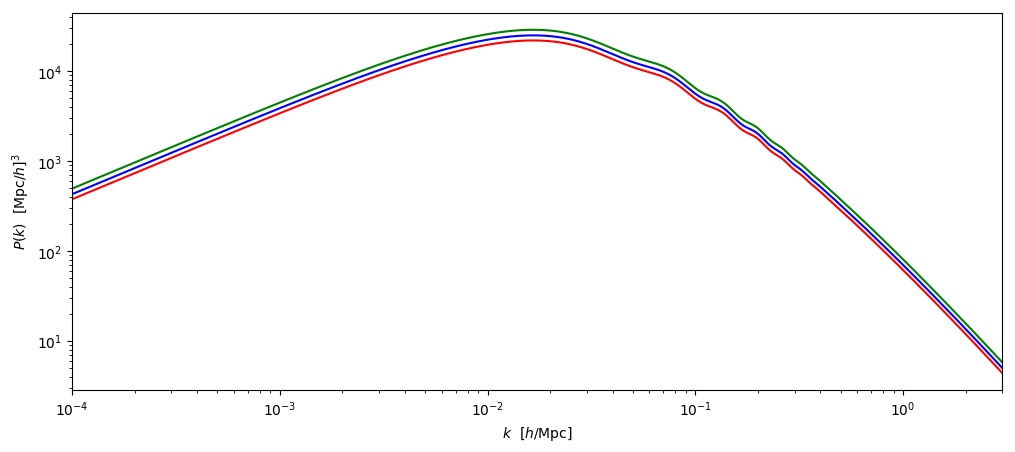

In [79]:
# plot P(k)
plt.figure(2)
plt.figure(figsize=(12, 5), dpi=100)
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,Pk,'b-') #LCDM
plt.plot(kk2,Pk2,'g-') # Constante de Hubble menor
plt.plot(kk3,Pk3,'r-') # Constante de Hubble maior

<Figure size 432x288 with 0 Axes>

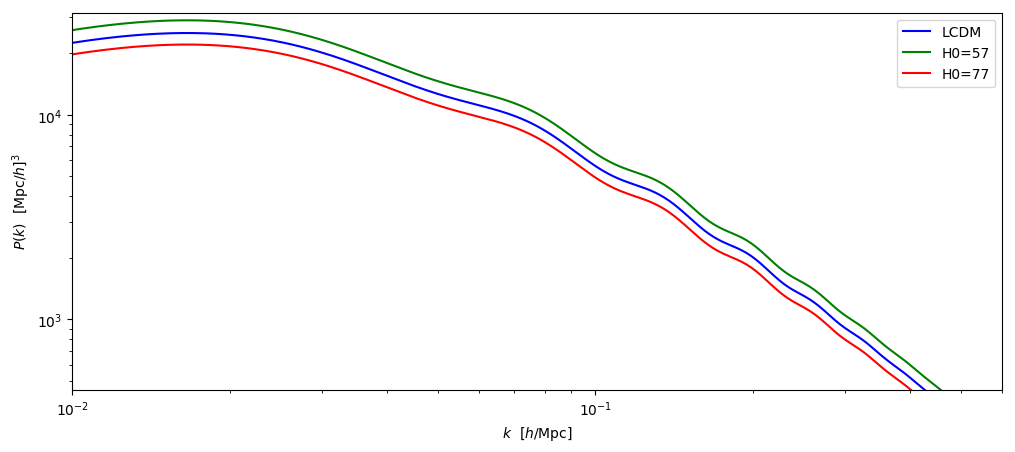

In [80]:
# plot P(k)
plt.figure(2)
plt.figure(figsize=(12, 5), dpi=100)
plt.xscale('log');plt.yscale('log');plt.xlim(0.01,0.6)
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.ylim(450,10**4.5)
plt.plot(kk,Pk,'b-',label='LCDM') #LCDM
plt.plot(kk2,Pk2,'g-',label='H0=57') # Constante de Hubble menor
plt.plot(kk3,Pk3,'r-',label='H0=77') # Constante de Hubble maior
plt.legend()

In [81]:
#apagando os modelos
LambdaCDM.empty()
LambdaCDM2.empty()
LambdaCDM3.empty()

Essas mudanças no Power Spectrum são sentidas através do parâmetro $\sigma_{8}$ definido como,
$$
\sigma_{8}^{2} = \dfrac{1}{2\pi^{2}}\int W_{s}^{2}k^{2}P(k)dk
$$
onde $W_{s}$ é um filtro tophat de raio $8h^{-1}Mpc$ no espaço de Fourier 
$$
W_{s} = \dfrac{3j_{1}(kR_{8})}{kR_{8}}
$$
onde $j_{1}$ são funções de Bessel esférica de primeira ordem. 

In [82]:
######## Definindo para o restante do trabalho
redshift = 0.001
Nbins = 30

In [83]:
#Definindo um modelo fiducial 
#parametros de https://arxiv.org/abs/1807.06209 Planck Results 2018
CosmoFiducial = cosmology.Cosmology(h=0.67556, T0_cmb=2.7255, Omega0_b = 0.0483,Omega0_cdm = 0.2638,n_s = 0.9619)
Plin = cosmology.LinearPower(CosmoFiducial, redshift, transfer='EisensteinHu')
SigmaFiducial = Plin.sigma_r(r=8)

In [84]:
OmegaB = np.linspace(0.0283, 0.0583, Nbins)
logL = np.empty(Nbins)
sigmaSimulados = np.empty(Nbins)
for m in range(Nbins):
    cosmo = cosmology.Cosmology(h=0.67556, T0_cmb=2.7255, Omega0_b = OmegaB[m],Omega0_cdm = 0.2638,n_s = 0.9619)
    Plin = cosmology.LinearPower(cosmo, redshift, transfer='CLASS')
    sigmaSimulados[m] = Plin.sigma_r(r=8)
    ErroSigma = Plin.sigma_r(r=8)/20
    logL[m] = - np.sum(0.5 * ((Plin.sigma_r(r=8) - SigmaFiducial ) / ErroSigma) ** 2)    
    

$$
\mathcal{L} = \Bigg(\dfrac{1}{2\pi\sigma^{2}}\Bigg)^{n/2}\exp\Bigg(- \dfrac{\sum^{n}_{i=1}(x_{i} - \mu)^{2}}{2\sigma^{2}}\Bigg) 
$$

$$
\ln\mathcal{L} \propto  \sum^{n}_{i=1}\dfrac{(x_{i} - \mu)^{2}}{2\sigma^{2}}
$$

O valor de Omega Barions que melhor ajusta os dados é [0.04278276]
E o besfit de sigma8 é [0.83472599]


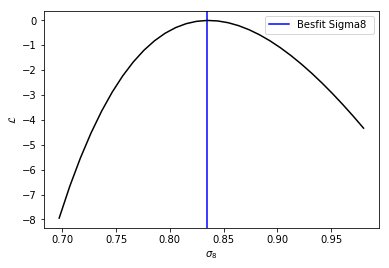

In [88]:
#Buscando qual foi o valor de OmegaB que determinou o máximo da Likelihood 
loc = np.where(logL == np.max(logL))
#print(loc)
#print(sigmaSimulados[loc])
print("O valor de Omega Barions que melhor ajusta os dados é {}".format(OmegaB[loc]))
print("E o besfit de sigma8 é {}".format(sigmaSimulados[loc]))
plt.axvline(x = sigmaSimulados[loc], color = 'b', label = 'Besfit Sigma8 ')
plt.plot(sigmaSimulados, logL, c='k')
plt.xlabel(r'$\sigma_{8}$')
plt.ylabel(r'$\mathcal{L}$')
plt.legend()

In [86]:
#Usando a mesma ídeia para restringir H0
hSample = np.linspace(0.57810, 0.77810, Nbins)
logL = np.empty(Nbins)
sigmaSimulados = np.empty(Nbins)
for m in range(Nbins):
    cosmo = cosmology.Cosmology(h=hSample[m], T0_cmb=2.7255, Omega0_b = 0.0483,Omega0_cdm = 0.2638,n_s = 0.9619)
    Plin = cosmology.LinearPower(cosmo, redshift, transfer='CLASS')
    sigmaSimulados[m] = Plin.sigma_r(r=8)
    ErroSigma = Plin.sigma_r(r=8)/20
    logL[m] = - np.sum(0.5 * ((Plin.sigma_r(r=8) - SigmaFiducial ) / ErroSigma) ** 2)    
    

O valor de h que melhor ajusta os dados é [0.67465172]
E o besfit de sigma8 é [0.83472599]


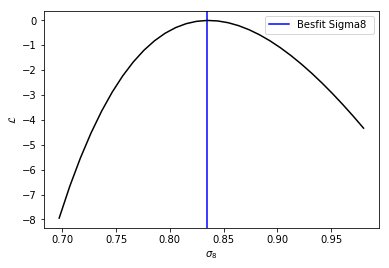

In [89]:
#Buscando qual foi o valor de h que determinou o máximo da Likelihood 
loc = np.where(logL == np.max(logL))
#print(loc)
#print(sigmaSimulados[loc])
print("O valor de h que melhor ajusta os dados é {}".format(hSample[loc]))
print("E o besfit de sigma8 é {}".format(sigmaSimulados[loc]))
plt.axvline(x = sigmaSimulados[loc], color = 'b', label = 'Besfit Sigma8 ')
plt.plot(sigmaSimulados, logL, c='k')
plt.xlabel(r'$\sigma_{8}$')
plt.ylabel(r'$\mathcal{L}$')
plt.legend()